In [1]:
!pip install tensorflow scikit-learn matplotlib

In [2]:
!pip install seaborn

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile

zip_path = "/content/drive/MyDrive/fish_dataset.zip"  # or use .zip exact path
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [5]:
import os
os.listdir("/content/data")


['Image Classification']

In [6]:
os.listdir("/content/data/Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/fish_dataset")


['train', 'test', 'val']

In [7]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix

# Dataset paths (based on user unzip structure)
dataset_base = "/content/data/Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/fish_dataset"
train_dir = os.path.join(dataset_base, "train")
val_dir = os.path.join(dataset_base, "val")
test_dir = os.path.join(dataset_base, "test")


In [15]:

# Parameters
img_height, img_width = 224, 224
batch_size = 50
epochs = 12


In [9]:
# Image Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                               batch_size=batch_size, class_mode='categorical')

val_data = test_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width),
                                            batch_size=batch_size, class_mode='categorical', shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                             batch_size=batch_size, class_mode='categorical', shuffle=False)

num_classes = train_data.num_classes


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [17]:

# CNN from scratch
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\nTraining CNN from scratch...")
cnn_history = cnn_model.fit(train_data, epochs=epochs, validation_data=val_data)
cnn_model.save("cnn_fish_model.h5")



Training CNN from scratch...
Epoch 1/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 637ms/step - accuracy: 0.2674 - loss: 2.9712 - val_accuracy: 0.5723 - val_loss: 1.2267
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 625ms/step - accuracy: 0.5553 - loss: 1.2615 - val_accuracy: 0.7317 - val_loss: 0.8884
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 621ms/step - accuracy: 0.6388 - loss: 1.0006 - val_accuracy: 0.8150 - val_loss: 0.6187
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 605ms/step - accuracy: 0.7422 - loss: 0.7479 - val_accuracy: 0.8672 - val_loss: 0.4450
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 609ms/step - accuracy: 0.7726 - loss: 0.6558 - val_accuracy: 0.8947 - val_loss: 0.3599
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 611ms/step - accuracy: 0.8129 - loss: 0.5399 - val_accuracy: 0.9203 - val_loss: 0.3018
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 603ms/step - accuracy: 0.8234 - loss: 0.5129 - val_accuracy: 0.9176 - val_loss: 0.2856
Epoch 8/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 614ms/ste

In [ ]:

    !cp /content/cnn_fish_model.h5 /content/drive/MyDrive/

## **Experiment with five pre-trained models**

In [19]:

# Parameters
img_height, img_width = 224, 224
batch_size = 50
epochs = 5


In [22]:
#VGG

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_history = vgg_model.fit(train_data, epochs=epochs, validation_data=val_data)
vgg_model.save("vgg16_fish_model.h5")


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 126s 943ms/step - accuracy: 0.2778 - loss: 2.1007 - val_accuracy: 0.6712 - val_loss: 1.3663
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 106s 848ms/step - accuracy: 0.6289 - loss: 1.2975 - val_accuracy: 0.8168 - val_loss: 0.8960
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 815ms/step - accuracy: 0.7451 - loss: 0.9365 - val_accuracy: 0.8288 - val_loss: 0.7003
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 99s 795ms/step - accuracy: 0.7779 - loss: 0.7474 - val_accuracy: 0.8864 - val_loss: 0.5302
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 726ms/step - accuracy: 0.8230 - loss: 0.6065 - val_accuracy: 0.8910 - val_loss: 0.4548


In [23]:
#ResNet 50

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data, epochs=epochs, validation_data=val_data)
resnet_model.save("resnet50_fish_model.h5")


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 190s 692ms/step - accuracy: 0.1596 - loss: 2.3338 - val_accuracy: 0.1703 - val_loss: 2.2171
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 627ms/step - accuracy: 0.1810 - loss: 2.2152 - val_accuracy: 0.1639 - val_loss: 2.1651
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 638ms/step - accuracy: 0.2098 - loss: 2.1516 - val_accuracy: 0.2106 - val_loss: 2.0729
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 639ms/step - accuracy: 0.2329 - loss: 2.0800 - val_accuracy: 0.2582 - val_loss: 2.0055
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 641ms/step - accuracy: 0.2559 - loss: 2.0405 - val_accuracy: 0.3178 - val_loss: 1.9901


In [24]:
#MobileNetV2
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

mobile_model = Model(inputs=base_model.input, outputs=predictions)
mobile_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mobile_history = mobile_model.fit(train_data, epochs=epochs, validation_data=val_data)
mobile_model.save("mobilenetv2_fish_model.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 99s 706ms/step - accuracy: 0.6702 - loss: 1.0146 - val_accuracy: 0.9615 - val_loss: 0.1360
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 603ms/step - accuracy: 0.9508 - loss: 0.1614 - val_accuracy: 0.9789 - val_loss: 0.0660
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 609ms/step - accuracy: 0.9704 - loss: 0.0918 - val_accuracy: 0.9716 - val_loss: 0.0729
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 599ms/step - accuracy: 0.9800 - loss: 0.0725 - val_accuracy: 0.9826 - val_loss: 0.0478
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 599ms/step - accuracy: 0.9882 - loss: 0.0467 - val_accuracy: 0.9799 - val_loss: 0.0552


In [35]:

    !cp /content/mobilenetv2_fish_model.h5 /content/drive/MyDrive/

In [25]:
#InceptionV3

from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

inception_model = Model(inputs=base_model.input, outputs=predictions)
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

inception_history = inception_model.fit(train_data, epochs=epochs, validation_data=val_data)
inception_model.save("inceptionv3_fish_model.h5")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 118s 799ms/step - accuracy: 0.5821 - loss: 1.3193 - val_accuracy: 0.9194 - val_loss: 0.2626
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 613ms/step - accuracy: 0.9001 - loss: 0.3184 - val_accuracy: 0.9423 - val_loss: 0.1766
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 623ms/step - accuracy: 0.9304 - loss: 0.2284 - val_accuracy: 0.9579 - val_loss: 0.1260
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 621ms/step - accuracy: 0.9357 - loss: 0.1987 - val_accuracy: 0.9643 - val_loss: 0.1066
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 618ms/step - accuracy: 0.9477 - loss: 0.1565 - val_accuracy: 0.9597 - val_loss: 0.1189


In [28]:
#EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

eff_model = Model(inputs=base_model.input, outputs=predictions)
eff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

eff_history = eff_model.fit(train_data, epochs=epochs, validation_data=val_data)
eff_model.save("efficientnetb0_fish_model.h5")


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 127s 788ms/step - accuracy: 0.1451 - loss: 2.3525 - val_accuracy: 0.1712 - val_loss: 2.3126
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 623ms/step - accuracy: 0.1691 - loss: 2.3181 - val_accuracy: 0.1712 - val_loss: 2.3110
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 627ms/step - accuracy: 0.1675 - loss: 2.3190 - val_accuracy: 0.1712 - val_loss: 2.3170
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 610ms/step - accuracy: 0.1739 - loss: 2.3116 - val_accuracy: 0.1712 - val_loss: 2.3116
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 624ms/step - accuracy: 0.1784 - loss: 2.3039 - val_accuracy: 0.1712 - val_loss: 2.3106


📋 Validation Accuracy Table (%):
   Epoch   VGG16 ResNet50 MobileNetV2 InceptionV3 EfficientNetB0
0      1  67.12%   17.03%      96.15%      91.94%         17.12%
1      2  81.68%   16.39%      97.89%      94.23%         17.12%
2      3  82.88%   21.06%      97.16%      95.79%         17.12%
3      4  88.64%   25.82%      98.26%      96.43%         17.12%
4      5   89.1%   31.78%      97.99%      95.97%         17.12%


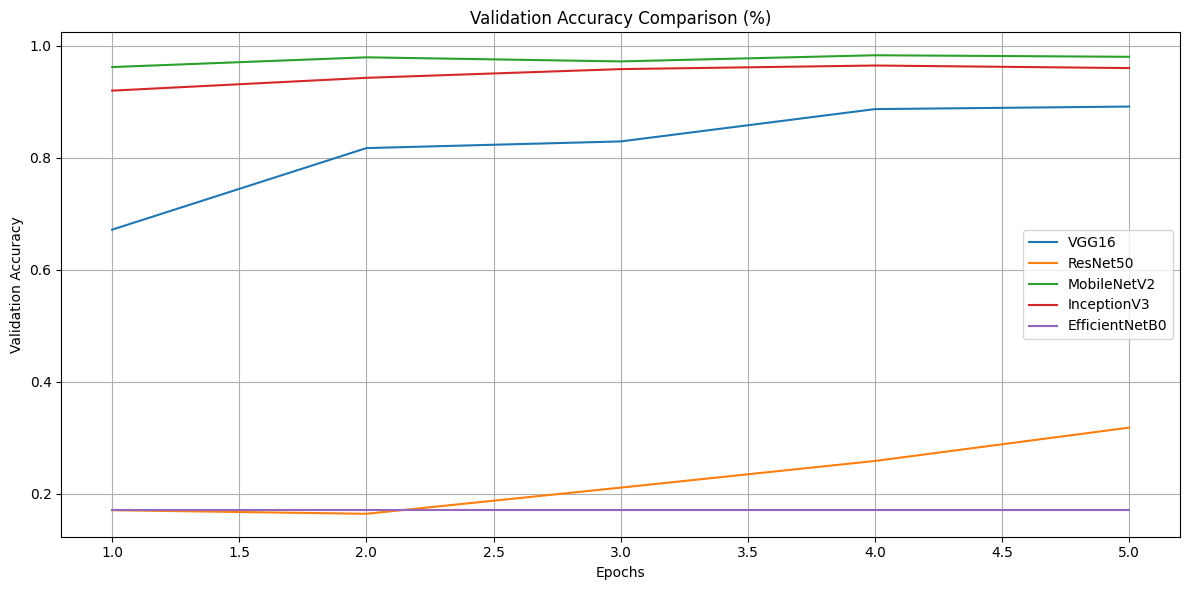

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create dictionary with validation accuracy
data = {
    "Epoch": list(range(1, epochs + 1)),
    "VGG16": vgg_history.history['val_accuracy'],
    "ResNet50": resnet_history.history['val_accuracy'],
    "MobileNetV2": mobile_history.history['val_accuracy'],
    "InceptionV3": inception_history.history['val_accuracy'],
    "EfficientNetB0": eff_history.history['val_accuracy']
}

# Step 2: Convert to DataFrame (raw float values)
df = pd.DataFrame(data)

# Step 3: Convert to percentage with % symbol
df_percent_str = df.copy()
for col in df_percent_str.columns[1:]:  # Skip 'Epoch'
    df_percent_str[col] = (df[col] * 100).round(2).astype(str) + '%'

# Optional: Display table (for notebook or console)
print("📋 Validation Accuracy Table (%):")
print(df_percent_str)

# Step 4: Plot using original float values
plt.figure(figsize=(12, 6))
plt.plot(df["Epoch"], df["VGG16"], label='VGG16')
plt.plot(df["Epoch"], df["ResNet50"], label='ResNet50')
plt.plot(df["Epoch"], df["MobileNetV2"], label='MobileNetV2')
plt.plot(df["Epoch"], df["InceptionV3"], label='InceptionV3')
plt.plot(df["Epoch"], df["EfficientNetB0"], label='EfficientNetB0')

plt.title("Validation Accuracy Comparison (%)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save table with % to CSV
df_percent_str.to_csv("accuracy_table_with_percent.csv", index=False)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step

📋 Classification Report MobileNetV2 :

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       187
                animal fish bass       1.00      0.60      0.75        10
   fish sea_food black_sea_sprat       1.00      0.99      1.00       105
   fish sea_food gilt_head_bream       0.98      1.00      0.99        94
   fish sea_food hourse_mackerel       0.99      1.00      0.99        97
        fish sea_food red_mullet       0.99      0.93      0.96        90
     fish sea_food red_sea_bream       1.00      0.98      0.99       113
          fish sea_food sea_bass       0.94      1.00      0.97        97
            fish sea_food shrimp       1.00      0.99      0.99       100
fish sea_food striped_red_mullet       0.92      0.94      0.93       101
             fish sea_food trout       1.00      1.00      1.00        98

                        accura

/tmp/ipython-input-34-3868709543.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


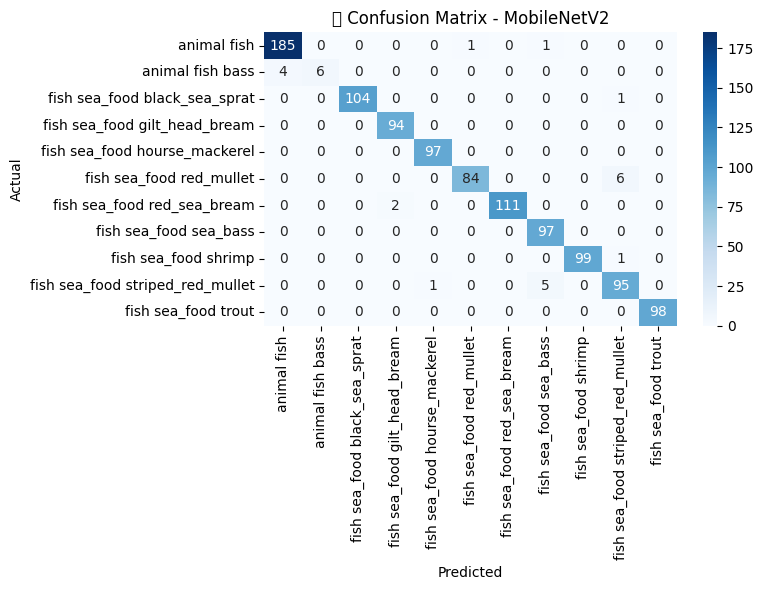

In [34]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ⚠️ Ensure val_data is not shuffled
val_data.reset()

# Step 1: Predict on validation data
y_pred_probs = mobile_model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes

# Step 2: Class label names
class_labels = list(val_data.class_indices.keys())

# Step 3: Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("\n📋 Classification Report MobileNetV2 :\n")
print(report)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("📊 Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


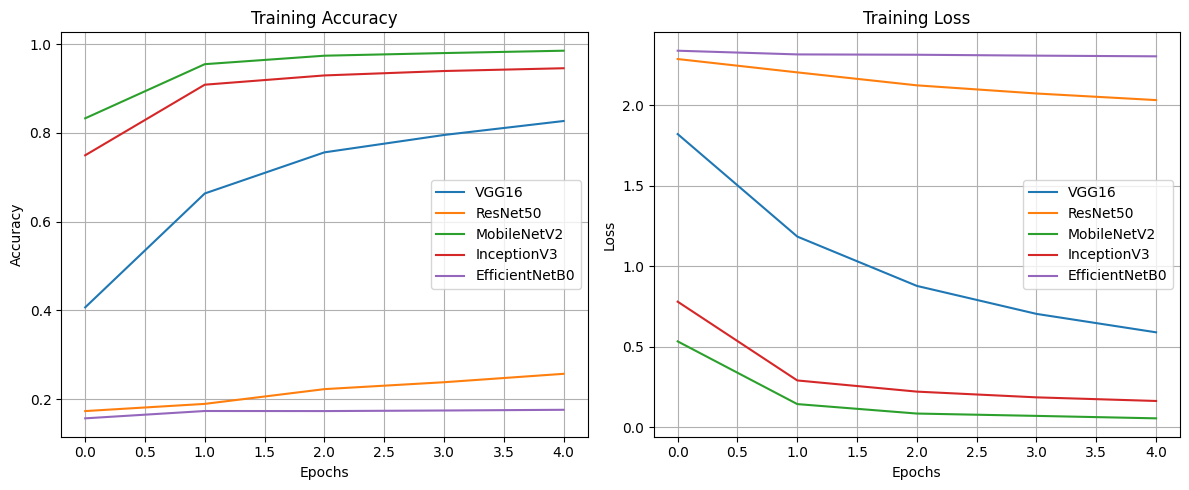

In [36]:
#Visualize Accuracy & Loss for All 5 Models

import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='VGG16')
plt.plot(resnet_history.history['accuracy'], label='ResNet50')
plt.plot(mobile_history.history['accuracy'], label='MobileNetV2')
plt.plot(inception_history.history['accuracy'], label='InceptionV3')
plt.plot(eff_history.history['accuracy'], label='EfficientNetB0')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG16')
plt.plot(resnet_history.history['loss'], label='ResNet50')
plt.plot(mobile_history.history['loss'], label='MobileNetV2')
plt.plot(inception_history.history['loss'], label='InceptionV3')
plt.plot(eff_history.history['loss'], label='EfficientNetB0')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
